In [2]:
# !curl -O http://openrecipes.s3.amazonaws.com/recipeitems-latest.json.gz 
# !gunzip recipeitems-latest.json.gz
import pandas as pd
import numpy as np



recipes = pd.read_json('recipeitems-latest.json', lines=True)
recipes.ingredients.str.contains('[Ff]lour').sum()

31287

In [59]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
                          'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']
import re

spice_df = pd.DataFrame(
dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE)) for spice in spice_list))
recipes.name[spice_df.query('parsley & paprika & tarragon').index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object

In [35]:
from dateutil import parser
date = parser.parse("17/11/2040")
date.strftime('%A')

'Saturday'

<IPython.core.display.Javascript object>


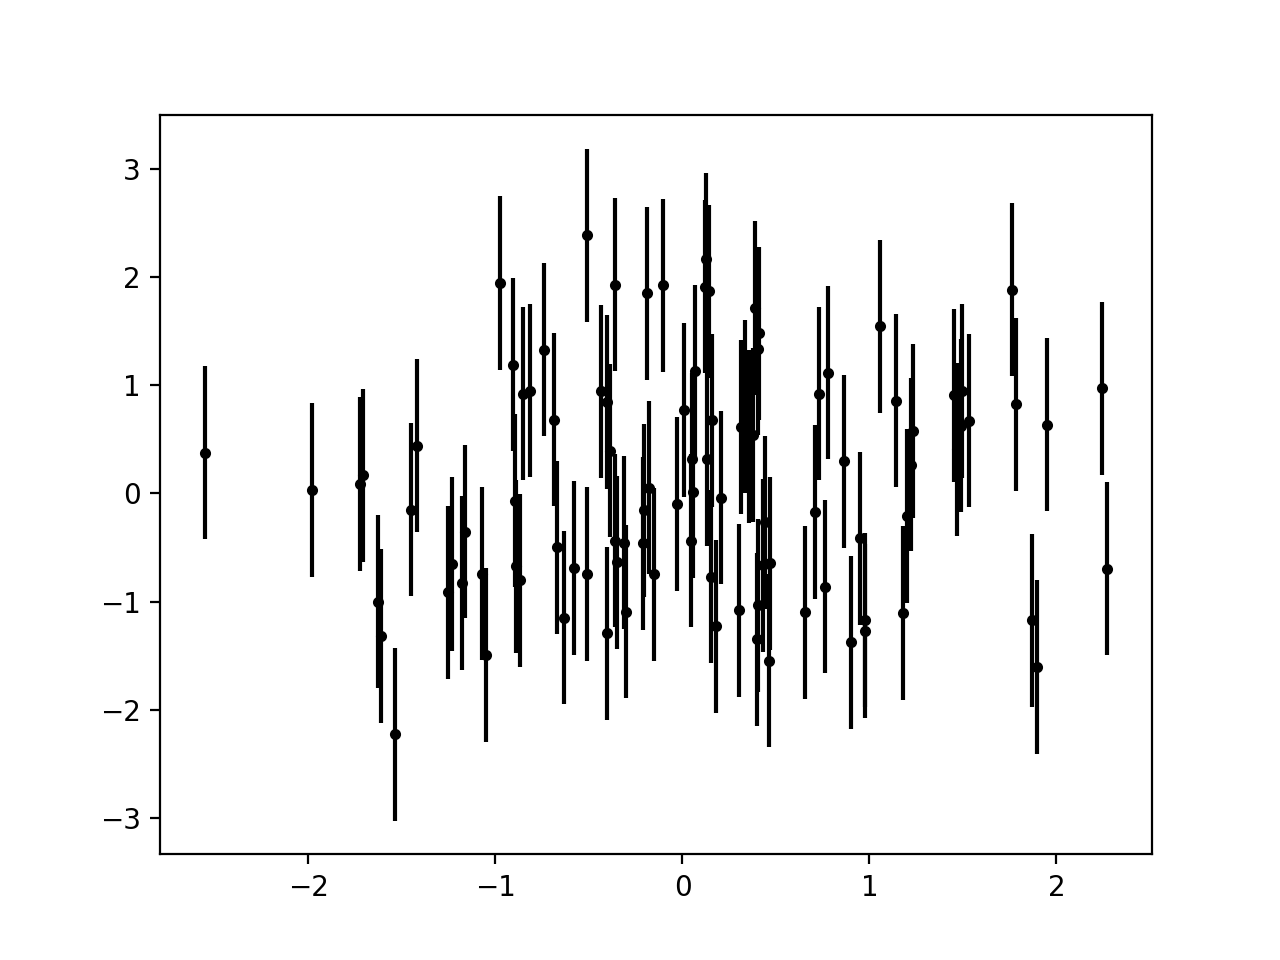

<ErrorbarContainer object of 3 artists>

In [4]:

import math
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.errorbar(x, y,yerr=0.8,fmt='.k')

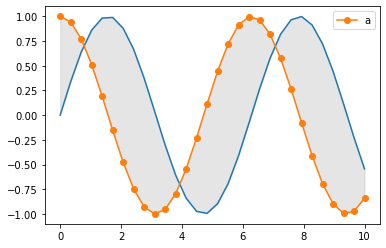

In [37]:

x = np.linspace(0,10,30)

fig, ax = plt.subplots()
plt.plot(x,np.sin(x))
ax.plot(x,np.cos(x),'o-',label='a')
leg = ax.legend();
plt.fill_between(x,np.sin(x),np.cos(x),
                            color='gray', alpha=0.2)



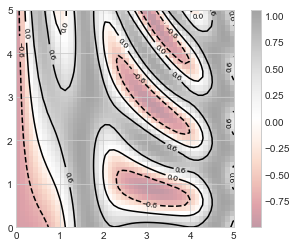

In [292]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y) 
Z=f(X,Y)
contours = plt.contour(x,y, Z, 3,colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
                      cmap='RdGy', alpha=0.4)
plt.colorbar();

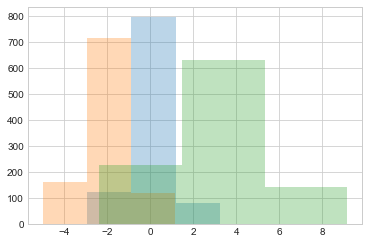

In [302]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3,  bins=3)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

<IPython.core.display.Javascript object>


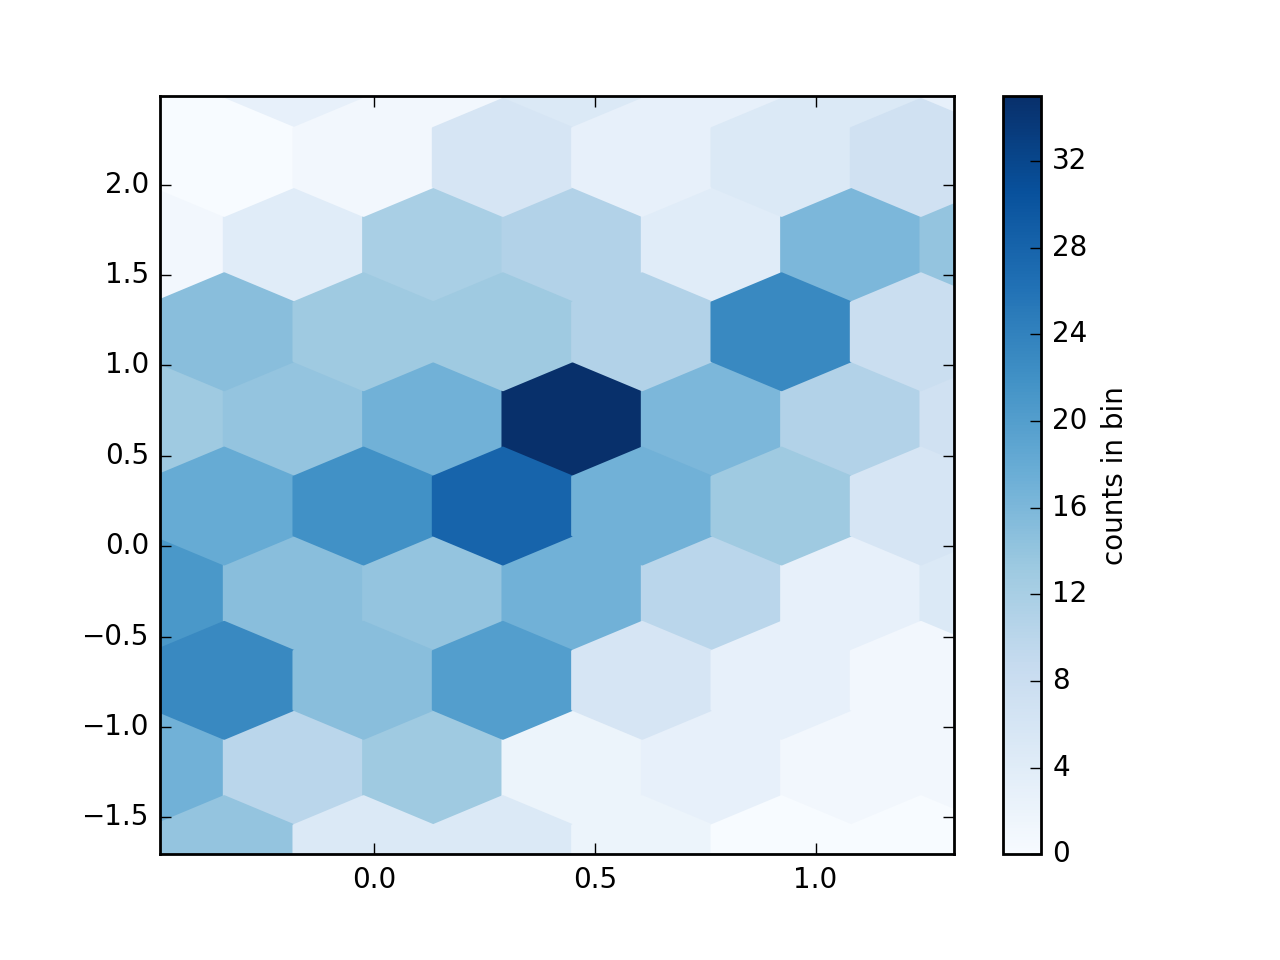

In [92]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hexbin(x, y, gridsize=20, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

array([[ 2.56308684, -1.70297147,  1.2388767 , ..., -2.47309179,
         0.39977497,  0.21552385],
       [ 0.65748499, -1.76546596,  1.12696007, ..., -1.99966145,
         0.33965421, -1.4337359 ]])

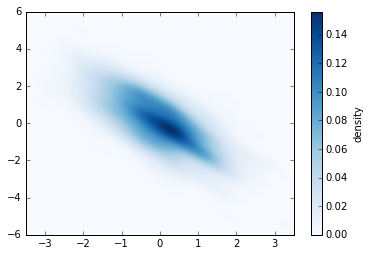

In [122]:
%matplotlib inline
from scipy.stats import gaussian_kde
# fit an array of size [Ndim, Nsamples]
            
data = np.vstack([x, y])
            
kde = gaussian_kde(data)        
# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 400)
ygrid = np.linspace(-6, 6, 400)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape), aspect='auto',
                       extent=[-3.5, 3.5, -6, 6],
                       cmap='Blues')
            
cb = plt.colorbar()
cb.set_label("density")
data

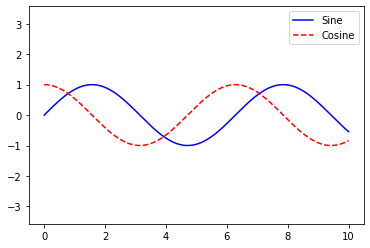

In [43]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

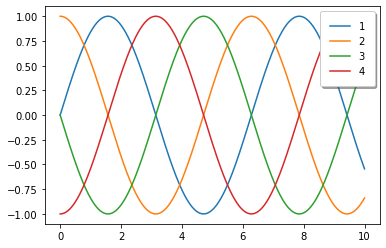

In [57]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x,y)
plt.legend(lines,['1','2','3','4'],fancybox=True,loc='upper right',framealpha=1, shadow=True, borderpad=1)

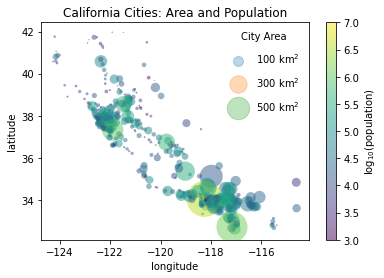

In [75]:
cities = pd.read_csv('california_cities.csv')
           
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']
           # Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), 
            s=area, linewidth=0, alpha=0.5)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)
# Here we create a legend:
# we'll plot empty lists with the desired size and label 
for area in [100, 300, 500]:
    plt.scatter([], [],  alpha=0.3, s=area,
                           label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
                      labelspacing=1, title='City Area')
plt.title('California Cities: Area and Population');

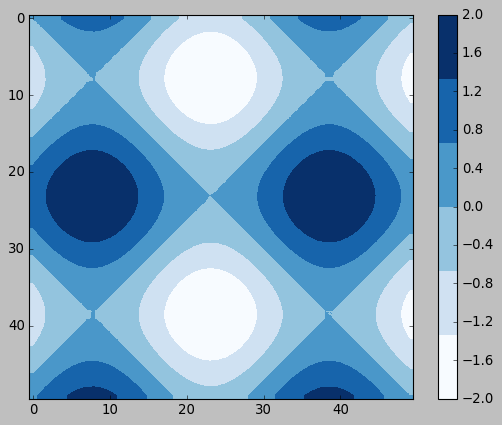

In [91]:
plt.style.use('classic')

x = np.linspace(0, 10, 50)
I = np.sin(x) - np.sin(x[:, np.newaxis])
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-2,2);

(1797, 8, 8)

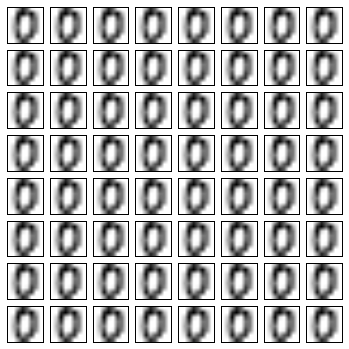

In [136]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
fig, ax = plt.subplots(8, 8, figsize=(6, 6)) 
for i, axi in enumerate(ax.flat):
                axi.imshow(digits.images[0], cmap='binary')
                axi.set(xticks=[], yticks=[])
digits.images.shape

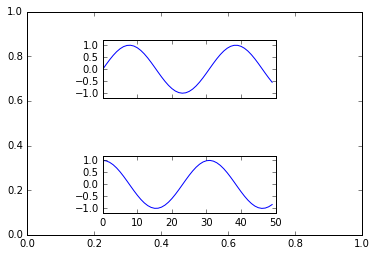

In [147]:
fig = plt.axes()
ax1 = plt.axes([0.3, 0.6, 0.4, 0.2],xticklabels=[], ylim=(-1.2, 1.2))
ax2 = plt.axes([0.3, 0.2, 0.4, 0.2],ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

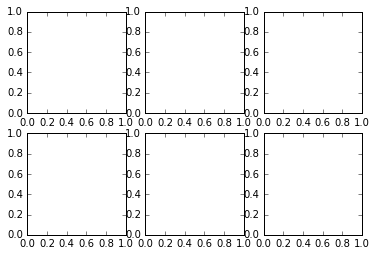

In [148]:
fig, ax = plt.subplots(2, 3)

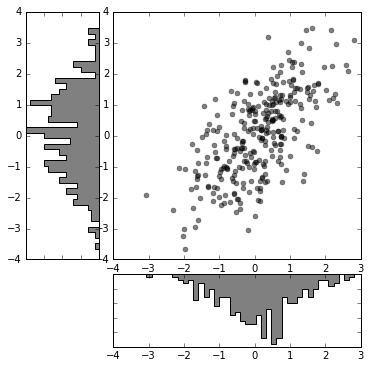

In [231]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 300).T

fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
            

main_ax.plot(x, y, 'ok', markersize=5, alpha=0.5)
# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
                        orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
                        orientation='horizontal', color='gray')
y_hist.invert_xaxis()

In [154]:
np.random.multivariate_normal?

<IPython.core.display.Javascript object>


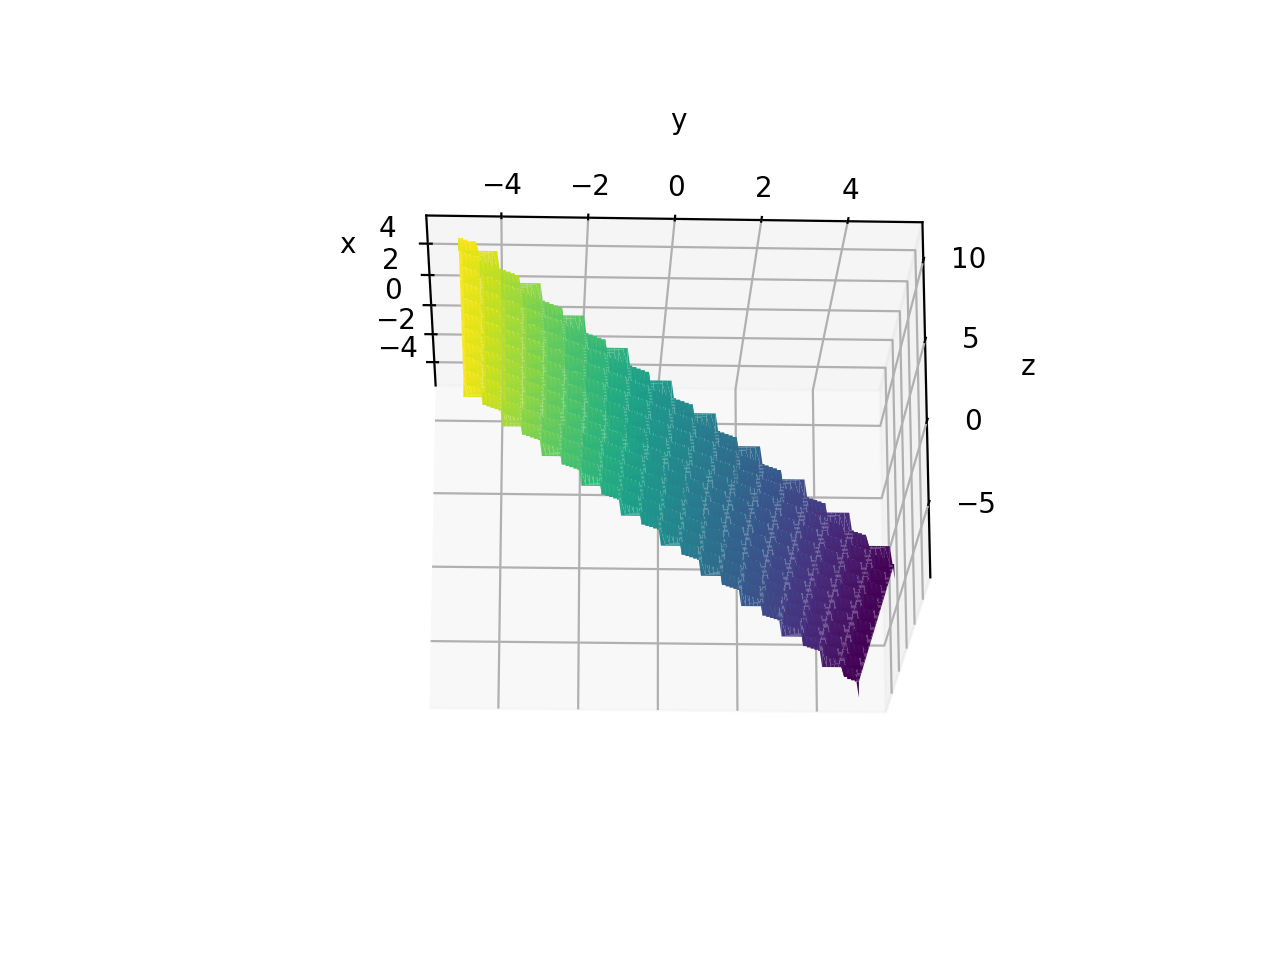

In [10]:
%matplotlib notebook
def f(x, y):
    return 1-(x+y)//1-(y-x)//1
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y) 
Z=f(X,Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                           cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');